In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data IMport
df = pd.read_csv('data/winequality_red.csv', sep=";")
df.head(5)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
# del df['quality']
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
## Remove columns we do not use in this example
print(df.corr())
print(df.dtypes)
print(df.shape)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [86]:
# Or you can use just this!!
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(df.iloc[:, 0:11], df.iloc[:, 11], test_size=0.3, random_state=123)

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
print(lr_pred)

[6.31681676 4.97232871 4.78311095 6.56231621 5.54059915 5.62835603
 6.30881268 5.68531791 5.40948989 5.67785065 4.95935049 6.83700139
 5.66609549 6.05291156 5.72246391 5.84826625 5.0756896  6.21286443
 5.93276182 5.35901735 6.07397843 5.66609549 5.84627323 5.49017233
 5.46032213 5.42699147 5.7467544  5.85536302 5.65267481 5.56125852
 5.16257337 6.52063243 5.65156692 5.15971877 6.33126323 4.86907289
 5.06658122 6.85451533 4.96194764 5.28754191 5.42846935 6.16867883
 5.66748667 5.23412291 5.31791117 4.81234795 5.28728863 5.12654499
 6.26282426 5.27460125 5.41661226 6.63764764 5.29979437 6.52076205
 4.78941683 6.43830512 5.32515367 5.06527696 5.74997355 5.13429659
 5.05699373 5.60715997 5.32657513 5.92227072 6.5582305  6.18423423
 6.26645485 5.5507413  5.57789699 5.75590359 5.31364541 5.74938778
 6.05681467 6.05846247 5.71598879 5.24827878 5.14185977 5.10888912
 5.5789007  5.61001931 5.10492967 5.1030762  6.47751417 5.3209062
 5.71130098 5.17889507 6.21719268 5.14599315 5.06971326 4.30019

[15350.81054018]


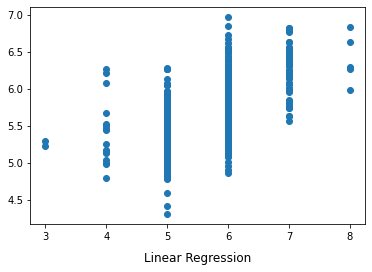

In [88]:
plt.scatter(x=tsty, y=lr_pred)
plt.title('Linear Regression', y=-0.2)
print(np.correlate(tsty, lr_pred))

In [89]:
from sklearn import metrics
print('RMSE: ', np.sqrt(metrics.mean_squared_error(lr_pred, tsty)))
print('R2: ', metrics.r2_score(tsty, lr_pred))

RMSE:  0.6503511121866126
R2:  0.3310001542880009


RMSE:  0.7853163123164475
R2:  0.024517505533790063
[15256.83660168]


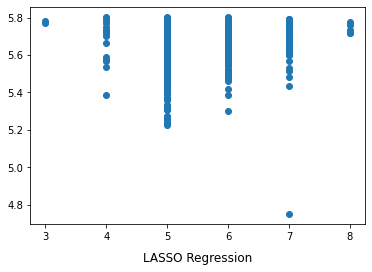

In [93]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(lr_pred_lasso, tsty)))
print('R2: ', metrics.r2_score(tsty, lr_pred_lasso))

plt.scatter(x=tsty, y=lr_pred_lasso)
plt.title('LASSO Regression', y=-0.2)
print(np.correlate(tsty, lr_pred_lasso))

RMSE:  0.6503909881080069
R2:  0.3309181130564175
[15351.7667598]


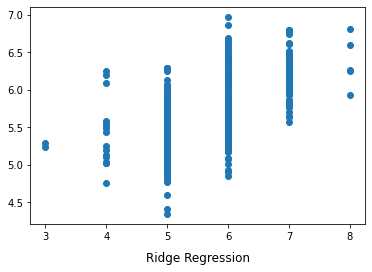

In [94]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(lr_pred_ridge, tsty)))
print('R2: ', metrics.r2_score(tsty, lr_pred_ridge))

plt.scatter(x=tsty, y=lr_pred_ridge)
plt.title('Ridge Regression', y=-0.2)
print(np.correlate(tsty, lr_pred_ridge))

In [109]:
print(model.coef_, model_ridge.coef_, model_lasso.coef_)

[ 4.71750074e-03 -1.12563719e+00 -1.31651219e-01  2.66135084e-02
 -2.01235877e+00 -1.01888983e-03 -2.51009655e-03 -2.15189889e+01
 -2.93708460e-01  8.96925009e-01  2.71920331e-01] [-8.09365294e-03 -1.15546769e+00 -1.58085095e-01  1.60841824e-02
 -1.30732444e+00 -9.14352072e-04 -2.42969869e-03 -1.68805972e-02
 -3.15856614e-01  7.63728021e-01  2.99840555e-01] [ 0.         -0.          0.          0.         -0.          0.
 -0.00388889 -0.         -0.          0.          0.        ]


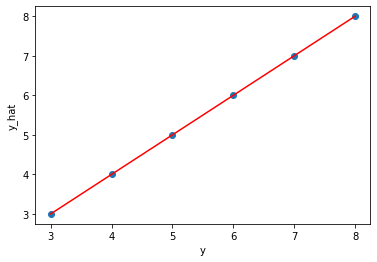

In [108]:
plt.scatter(x=[3,4,5,6,7,8,], y=[3,4,5,6,7,8])
plt.plot([3,8], [3,8], color='red')
plt.xlabel('y')
plt.ylabel('y_hat')
plt.show()